## Visualize results of sweeping noise parameter

In [1]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /home/wmkouw/.julia/packages/Revise/OgnOk/src/packagedef.jl:1381


In [2]:
include("util.jl");

In [3]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

### Plot RMS as function of noise

In [4]:
sample_sizes = 2 .^collect(7:11)
which_sizes = 1:length(sample_sizes)
num_sizes = length(which_sizes)
sample_sizes[which_sizes]'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 128  256  512  1024  2048

In [10]:
stde = [0.01, 0.02, 0.03, 0.04, 0.05, 0.6]
which_noises = 1:5
num_noises = length(which_noises)
stde[which_noises]'

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.01  0.02  0.03  0.04  0.05

In [15]:
# Number of repetitions
num_repeats = 100

mτ_0 = 2000.0
deg = 3
pol = 3
order = 4
basis = 22

results_sim_FEM = zeros(num_noises,num_sizes,2)
results_prd_FEM = zeros(num_noises,num_sizes,2)
results_sim_RLS = zeros(num_noises,num_sizes,2)
results_prd_RLS = zeros(num_noises,num_sizes,2)
results_sim_ILS = zeros(num_noises,num_sizes,2)
results_prd_ILS = zeros(num_noises,num_sizes,2)

RMS_sim_FEM = zeros(num_repeats,num_noises,num_sizes)
RMS_prd_FEM = zeros(num_repeats,num_noises,num_sizes)
RMS_sim_RLS = zeros(num_repeats,num_noises,num_sizes)
RMS_prd_RLS = zeros(num_repeats,num_noises,num_sizes)
RMS_sim_ILS = zeros(num_repeats,num_noises,num_sizes)
RMS_prd_ILS = zeros(num_repeats,num_noises,num_sizes)

for s = 1:num_noises
    for r = 1:num_repeats

        # Load
        FEM_data = load("results/results-NARMAX_FEM_stde"*string(stde[s])*"_pol"*string(pol)*"_M"*string(order)*"_N"*string(basis)*"_degree"*string(deg)*"_mtau_"*string(mτ_0)*"_r"*string(r)*".jld")
        RMS_prd_FEM[r,s,:] = FEM_data["RMS_prd"][which_sizes]
        RMS_sim_FEM[r,s,:] = FEM_data["RMS_sim"][which_sizes]

        RLS_data = load("results/results-NARMAX_RLS_stde"*string(stde[s])*"_pol"*string(pol)*"_M"*string(order)*"_N"*string(basis)*"_degree"*string(deg)*"_r"*string(r)*".jld")
        RMS_prd_RLS[r,s,:] = RLS_data["RMS_prd"][which_sizes]
        RMS_sim_RLS[r,s,:] = RLS_data["RMS_sim"][which_sizes]

        ILS_data = matread("results/results-NARMAX_ILS_stde"*string(stde[s])*"_pol"*string(pol)*"_M"*string(order)*"_N"*string(basis)*"_degree"*string(deg)*"_r"*string(r)*".mat")
        RMS_prd_ILS[r,s,:] = ILS_data["RMS_prd"][which_sizes]
        RMS_sim_ILS[r,s,:] = ILS_data["RMS_sim"][which_sizes]

    end
end    

# Map all infinities to NaN
RMS_prd_FEM[isinf.(RMS_prd_FEM)] .= NaN
RMS_sim_FEM[isinf.(RMS_sim_FEM)] .= NaN
RMS_prd_RLS[isinf.(RMS_prd_RLS)] .= NaN
RMS_sim_RLS[isinf.(RMS_sim_RLS)] .= NaN
RMS_prd_ILS[isinf.(RMS_prd_ILS)] .= NaN
RMS_sim_ILS[isinf.(RMS_sim_ILS)] .= NaN
    
# Check for proportion of instable
instab_sim_FEM = mean(isnan.(RMS_sim_FEM),dims=1)
instab_prd_FEM = mean(isnan.(RMS_prd_FEM),dims=1)
instab_sim_RLS = mean(isnan.(RMS_sim_RLS),dims=1)
instab_prd_RLS = mean(isnan.(RMS_prd_RLS),dims=1)
instab_sim_ILS = mean(isnan.(RMS_sim_ILS),dims=1)
instab_prd_ILS = mean(isnan.(RMS_prd_ILS),dims=1)

# Populate RMS array
trim_prctile = 0.0
for s = 1:num_noises
    for n = 1:num_sizes
    
        results_sim_FEM[s,n,1] = tmean(filter(!isnan, RMS_sim_FEM[:,s,n]), tr=trim_prctile)
        results_sim_FEM[s,n,2] = trimse(filter(!isnan, RMS_sim_FEM[:,s,n]), tr=trim_prctile)
        results_prd_FEM[s,n,1] = tmean(filter(!isnan, RMS_prd_FEM[:,s,n]), tr=trim_prctile)
        results_prd_FEM[s,n,2] = trimse(filter(!isnan, RMS_prd_FEM[:,s,n]), tr=trim_prctile)

        results_sim_RLS[s,n,1] = tmean(filter(!isnan, RMS_sim_RLS[:,s,n]), tr=trim_prctile)
        results_sim_RLS[s,n,2] = trimse(filter(!isnan, RMS_sim_RLS[:,s,n]), tr=trim_prctile)
        results_prd_RLS[s,n,1] = tmean(filter(!isnan, RMS_prd_RLS[:,s,n]), tr=trim_prctile)
        results_prd_RLS[s,n,2] = trimse(filter(!isnan, RMS_prd_RLS[:,s,n]), tr=trim_prctile)

        results_sim_ILS[s,n,1] = tmean(filter(!isnan, RMS_sim_ILS[:,s,n]), tr=trim_prctile)
        results_sim_ILS[s,n,2] = trimse(filter(!isnan, RMS_sim_ILS[:,s,n]), tr=trim_prctile)
        results_prd_ILS[s,n,1] = tmean(filter(!isnan, RMS_prd_ILS[:,s,n]), tr=trim_prctile)
        results_prd_ILS[s,n,2] = trimse(filter(!isnan, RMS_prd_ILS[:,s,n]), tr=trim_prctile)
        
    end
end

In [16]:
which_size = 1
sample_sizes[which_size]

128

### Simulation error

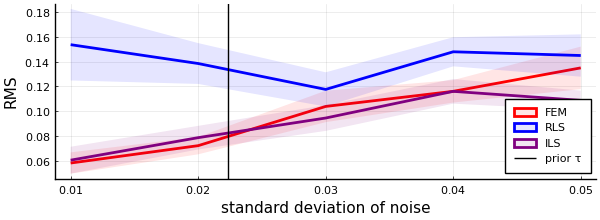

In [18]:
p6 = plot(stde[which_noises], 
          results_sim_FEM[:,which_size,1], 
          ribbon=[results_sim_FEM[:,which_size,2] results_sim_FEM[:,which_size,2]], 
          color="red", 
          label="FEM", 
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="standard deviation of noise",
          legend=:bottomright,
          ylabel="RMS",
          size=(600,220))
plot!(stde[which_noises], results_sim_RLS[:,which_size,1], 
     ribbon=[results_sim_RLS[:,which_size,2] results_sim_RLS[:,which_size,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(stde[which_noises], results_sim_ILS[:,which_size,1], 
     ribbon=[results_sim_ILS[:,which_size,2] results_sim_ILS[:,which_size,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="ILS")
vline!([sqrt(inv(mτ_0))], color="black", label="prior τ")

In [248]:
savefig(p6, "figures/sweep-stde-RMS-sim_deg"*string(deg)*"_order"*string(order)*"_basis"*string(basis)*"_sem.png")

In [249]:
# Filter NaN's
fRMS_stde1_sim_FEM = filter(!isnan, RMS_sim_FEM[:,1,1])
fRMS_stde1_sim_RLS = filter(!isnan, RMS_sim_RLS[:,1,1])
fRMS_stde1_sim_ILS = filter(!isnan, RMS_sim_ILS[:,1,1])
fRMS_stde2_sim_FEM = filter(!isnan, RMS_sim_FEM[:,2,1])
fRMS_stde2_sim_RLS = filter(!isnan, RMS_sim_RLS[:,2,1])
fRMS_stde2_sim_ILS = filter(!isnan, RMS_sim_ILS[:,2,1])
# fRMS_stde3_sim_FEM = filter(!isnan, RMS_sim_FEM[:,3,1])
# fRMS_stde3_sim_RLS = filter(!isnan, RMS_sim_RLS[:,3,1])
# fRMS_stde3_sim_ILS = filter(!isnan, RMS_sim_ILS[:,3,1])
# fRMS_stde4_sim_FEM = filter(!isnan, RMS_sim_FEM[:,4,1])
# fRMS_stde4_sim_RLS = filter(!isnan, RMS_sim_RLS[:,4,1])
# fRMS_stde4_sim_ILS = filter(!isnan, RMS_sim_ILS[:,4,1]);

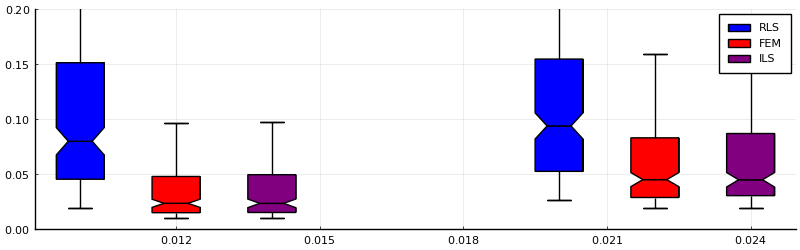

In [250]:
p400 = boxplot([stde[1]], fRMS_stde1_sim_RLS, bar_width=0.001, label="RLS", color="blue", markerstrokecolor="blue", notch=true, outliers=false, size=(800,250))
boxplot!([stde[1]+0.002], fRMS_stde1_sim_FEM, bar_width=0.001, label="FEM", color="red", markerstrokecolor="red", notch=true, outliers=false)
boxplot!([stde[1]+0.004], fRMS_stde1_sim_ILS, bar_width=0.001, label="ILS", color="purple", markerstrokecolor="purple", notch=true, outliers=false)
boxplot!([stde[2]],       fRMS_stde2_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true, outliers=false)
boxplot!([stde[2]+0.002], fRMS_stde2_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true, outliers=false)
boxplot!([stde[2]+0.004], fRMS_stde2_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true, outliers=false)
# boxplot!([stde[3]],       fRMS_stde3_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true, outliers=false)
# boxplot!([stde[3]+0.002], fRMS_stde3_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true, outliers=false)
# boxplot!([stde[3]+0.004], fRMS_stde3_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true, outliers=false)
# boxplot!([stde[4]],       fRMS_stde4_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true, outliers=false)
# boxplot!([stde[4]+0.002], fRMS_stde4_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true, outliers=false)
# boxplot!([stde[4]+0.004], fRMS_stde4_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true, outliers=false)
ylims!(0., 0.2)

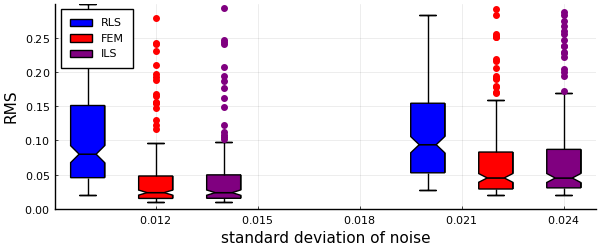

In [251]:
p400 = boxplot([stde[1]], fRMS_stde1_sim_RLS, bar_width=0.001, label="RLS", color="blue", markerstrokecolor="blue", notch=true, size=(600,250), legend=:topleft)#, yscale=:log10)
boxplot!([stde[1]+0.002], fRMS_stde1_sim_FEM, bar_width=0.001, label="FEM", color="red", markerstrokecolor="red", notch=true)
boxplot!([stde[1]+0.004], fRMS_stde1_sim_ILS, bar_width=0.001, label="ILS", color="purple", markerstrokecolor="purple", notch=true)
boxplot!([stde[2]],       fRMS_stde2_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true)
boxplot!([stde[2]+0.002], fRMS_stde2_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true)
boxplot!([stde[2]+0.004], fRMS_stde2_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true)
# boxplot!([stde[3]],       fRMS_stde3_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true)
# boxplot!([stde[3]+0.002], fRMS_stde3_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true)
# boxplot!([stde[3]+0.004], fRMS_stde3_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true)
# boxplot!([stde[4]],       fRMS_stde4_sim_RLS, bar_width=0.001, label="", color="blue", markerstrokecolor="blue", notch=true)
# boxplot!([stde[4]+0.002], fRMS_stde4_sim_FEM, bar_width=0.001, label="", color="red", markerstrokecolor="red", notch=true)
# boxplot!([stde[4]+0.004], fRMS_stde4_sim_ILS, bar_width=0.001, label="", color="purple", markerstrokecolor="purple", notch=true)
ylims!(0., 0.3)
ylabel!("RMS")
xlabel!("standard deviation of noise")

In [252]:
savefig(p400, "figures/sweep-stde-RMS-sim_deg"*string(deg)*"_order"*string(order)*"_basis"*string(basis)*"_box.png")

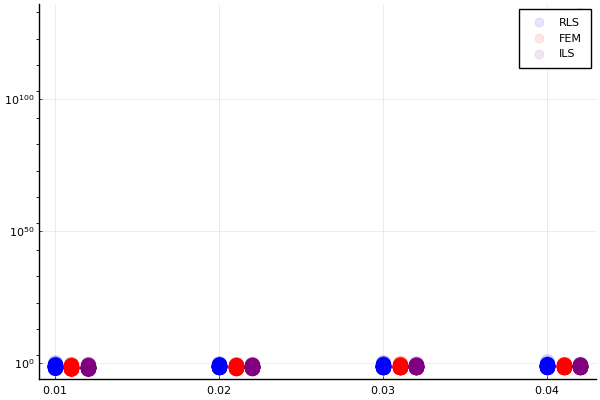

In [253]:
p400 = scatter([stde[1]], RMS_sim_RLS[:,1,1], markersize=10, alpha=0.1, yscale=:log10, label="RLS", color="blue", markerstrokecolor="blue")
scatter!([stde[1]+0.001], RMS_sim_FEM[:,1,1], markersize=10, alpha=0.1, label="FEM", color="red", markerstrokecolor="red")
scatter!([stde[1]+0.002], RMS_sim_ILS[:,1,1], markersize=10, alpha=0.1, label="ILS", color="purple", markerstrokecolor="purple")
scatter!([stde[2]],       RMS_sim_RLS[:,2,1], markersize=10, alpha=0.1, label="", color="blue", markerstrokecolor="blue")
scatter!([stde[2]+0.001], RMS_sim_FEM[:,2,1], markersize=10, alpha=0.1, label="", color="red", markerstrokecolor="red")
scatter!([stde[2]+0.002], RMS_sim_ILS[:,2,1], markersize=10, alpha=0.1, label="", color="purple", markerstrokecolor="purple")
scatter!([stde[3]],       RMS_sim_RLS[:,3,1], markersize=10, alpha=0.1, label="", color="blue", markerstrokecolor="blue")
scatter!([stde[3]+0.001], RMS_sim_FEM[:,3,1], markersize=10, alpha=0.1, label="", color="red", markerstrokecolor="red")
scatter!([stde[3]+0.002], RMS_sim_ILS[:,3,1], markersize=10, alpha=0.1, label="", color="purple", markerstrokecolor="purple")
scatter!([stde[4]],       RMS_sim_RLS[:,4,1], markersize=10, alpha=0.1, label="", color="blue", markerstrokecolor="blue")
scatter!([stde[4]+0.001], RMS_sim_FEM[:,4,1], markersize=10, alpha=0.1, label="", color="red", markerstrokecolor="red")
scatter!([stde[4]+0.002], RMS_sim_ILS[:,4,1], markersize=10, alpha=0.1, label="", color="purple", markerstrokecolor="purple")

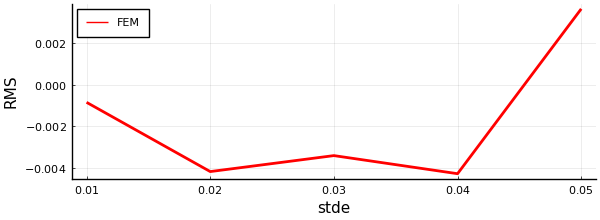

In [254]:
p6 = plot(stde[which_noises], results_sim_FEM[:,which_size,1] .- results_sim_ILS[:,which_size,1], 
          color="red", 
          label="FEM", 
#           xscale=:log2,
#           yscale=:log10,
#           ylims=[0.08, 0.15],
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="stde",
          legend=:topleft,
          ylabel="RMS",
          size=(600,220))

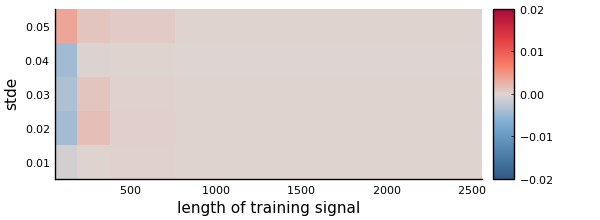

In [255]:
comparison = results_sim_FEM[:,:,1] .- results_sim_ILS[:,:,1]

heatmap(sample_sizes[which_sizes],
        stde[which_noises],
        comparison,
        xlabel="length of training signal",
        ylabel="stde",
        clims=(-0.02, 0.02),
        c=reverse(cgrad(:tableau_red_blue)),
        size=(600,220))

In [256]:
mean(RMS_sim_FEM[:,:,1] .< RMS_sim_ILS[:,:,1], dims=1)

1×5 Matrix{Float64}:
 0.49  0.515  0.445  0.465  0.375

### 1-step prediction error

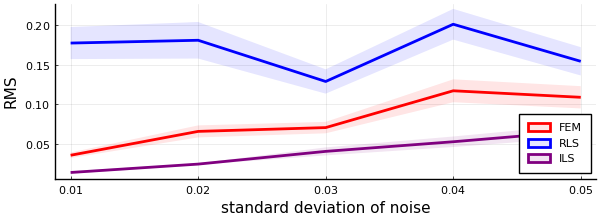

In [14]:
p6 = plot(stde[which_noises], 
          results_prd_FEM[:,which_size,1], 
          ribbon=[results_prd_FEM[:,which_size,2] results_prd_FEM[:,which_size,2]], 
          color="red", 
          label="FEM", 
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="standard deviation of noise",
          legend=:bottomright,
          ylabel="RMS",
          size=(600,220))
plot!(stde[which_noises], results_prd_RLS[:,which_size,1], 
     ribbon=[results_prd_RLS[:,which_size,2] results_prd_RLS[:,which_size,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(stde[which_noises], results_prd_ILS[:,which_size,1], 
     ribbon=[results_prd_ILS[:,which_size,2] results_prd_ILS[:,which_size,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="ILS")
# vline!([sqrt(inv(mτ_chosen))], color="black", label="prior τ")

In [258]:
savefig(p6, "figures/sweep-stde-RMS-prd_deg"*string(deg)*"_order"*string(order)*"_basis"*string(basis)*"_sem.png")